<a href="https://colab.research.google.com/github/nivas1133/nivas1133.github.io/blob/main/face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from matplotlib import pyplot as plt

In [ ]:
import os

# Specify the path to the main directory
main_directory = '/content/drive/MyDrive/datasets/celebrities_images'

# Initialize counts and storage for folder data
folder_count = 0
total_file_count = 0
folder_data = []

# Iterate through the main directory
for root, dirs, files in os.walk(main_directory):
    # Skip the root directory itself if it contains files
    if root == main_directory:
        continue

    # Count files in each folder
    folder_file_count = len(files)
    total_file_count += folder_file_count

    # Store the folder name and the number of files in that folder
    folder_data.append((os.path.basename(root), folder_file_count))

# Sort the folder data by file count in ascending order
folder_data.sort(key=lambda x: x[1])

# Print the sorted folder data
for folder_name, file_count in folder_data:
    print(f"Folder: {folder_name}, Files: {file_count}")

# Print the overall results
print(f"\nNumber of folders: {len(folder_data)}")
print(f"Total number of files: {total_file_count}")


Folder: Ajay Devgn, Files: 173
Folder: IIeana DCruz, Files: 179
Folder: Disha Patani, Files: 183
Folder: Aamir Khan, Files: 189
Folder: Angelina Jolie, Files: 189
Folder: Amitabh Bachchan, Files: 195
Folder: Alia Bhatt, Files: 196
Folder: Anushka Sharma, Files: 210
Folder: Aishwarya Rai, Files: 218
Folder: Deepika Padukone, Files: 227

Number of folders: 10
Total number of files: 1959


In [ ]:
!pip install mtcnn

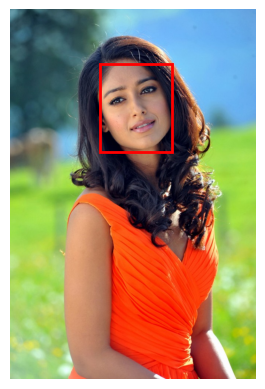

In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mtcnn import MTCNN

# Function to perform face detection and display the image with bounding boxes
def detect_and_display_faces(image_path):
    # Load the image
    img = cv2.imread(image_path)

    # Convert the image to RGB for compatibility with MTCNN
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Load the pre-trained MTCNN model
    detector = MTCNN()

    # Perform face detection
    faces = detector.detect_faces(img_rgb)

    # Display the original image
    fig, ax = plt.subplots()
    ax.imshow(img_rgb)

    # Add bounding boxes for each detected face
    for face in faces:
        x, y, w, h = face['box']
        rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

    plt.axis('off')
    plt.show()

# Specify the path to the main directory
main_directory = '/content/drive/MyDrive/datasets/celebrities_images'

# Get a list of all folders
all_folders = [folder for folder in os.listdir(main_directory) if os.path.isdir(os.path.join(main_directory, folder))]

# Randomly pick a folder
selected_folder = random.choice(all_folders)
folder_path = os.path.join(main_directory, selected_folder)

# Get a list of all images in the selected folder
all_images = [img for img in os.listdir(folder_path) if img.endswith('.jpg')]

# Randomly pick an image from the folder
selected_image = random.choice(all_images)
image_path = os.path.join(folder_path, selected_image)

# Perform face detection using MTCNN and display the result
detect_and_display_faces(image_path)

In [ ]:
!pip install facenet-pytorch

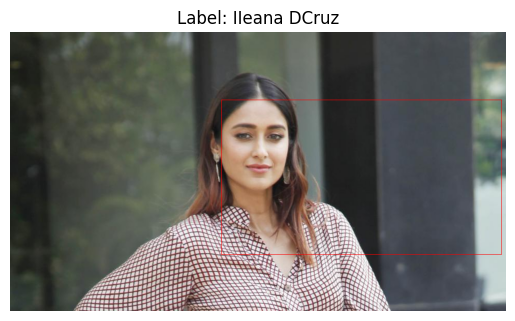

Embeddings for Detected Face 1: [ 4.63597290e-02  2.55389692e-04  4.58856411e-02  1.75268073e-02
  7.20686987e-02 -3.95627730e-02 -1.39966123e-02 -1.12492079e-02
 -1.29640158e-02 -3.18998136e-02 -8.36964324e-02 -3.02576944e-02
 -9.06904787e-02 -2.24571284e-02  6.98928684e-02 -4.47398014e-02
 -4.57946677e-03 -3.61076556e-02  2.33894009e-02  3.22684087e-02
  1.66935194e-02  3.14717256e-02 -5.60223348e-02  1.01421252e-02
  1.88137256e-02  4.46557999e-03  1.14092067e-01 -9.41232021e-04
  2.41922960e-02 -8.95768851e-02 -1.03297196e-02  4.62150760e-02
  2.03142408e-02  1.96722522e-02  5.98127097e-02  6.18492067e-03
 -5.99189512e-02  2.52508968e-02 -3.06483060e-02  2.18398850e-02
  2.11236044e-03  1.46443490e-02  1.41817387e-02 -1.15431286e-01
 -1.03457104e-02 -5.36509193e-02  3.29446495e-02 -1.77679341e-02
 -3.69842574e-02  2.51342990e-02  1.11035734e-01  6.51904568e-02
  6.19931333e-02  5.86195290e-02  6.43199682e-03 -3.99380438e-02
  3.13870348e-02  7.47971609e-02  7.94461183e-03  2.439454

In [ ]:
from facenet_pytorch import MTCNN, InceptionResnetV1, extract_face
from PIL import Image
import random
import os

# Function to process image, detect face, and calculate embeddings
def process_image(image_path, face_detector, face_embedder, label):
    # Read the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Detect faces using MTCNN
    boxes, probs = face_detector.detect(image_rgb)

    if boxes is not None:
        # Display label of the image using the folder it is picked up from
        plt.title(f"Label: {label}")

        # Display original image
        plt.imshow(Image.fromarray(image_rgb))

        # Draw a rectangle around each detected face on the original image
        for i, box in enumerate(boxes):
            x, y, w, h = box
            # Draw a rectangle around the detected face with thinner lines
            cv2.rectangle(image_rgb, (int(x), int(y)), (int(x + w), int(y + h)), (255, 0, 0), 1)

        # Display the image with the rectangles around detected faces
        plt.imshow(Image.fromarray(image_rgb))

        plt.axis('off')
        plt.show()

        # Apply transformations and normalization
        transformed_faces = [face_embedder(extract_face(image_rgb, box).unsqueeze(0)) for box in boxes]

        # Convert PyTorch tensor to NumPy array
        transformed_faces_np = [transformed_face.squeeze().detach().numpy() for transformed_face in transformed_faces]

        # Print the embeddings
        for i, embeddings in enumerate(transformed_faces_np):
            print(f"Embeddings for Detected Face {i + 1}:", embeddings)

# Directory paths
train_directory = '/content/drive/MyDrive/datasets/celebrities_images'

# Randomly pick a folder
selected_folder = random.choice(os.listdir(train_directory))
selected_folder_path = os.path.join(train_directory, selected_folder)

# Randomly pick one file from the selected folder
file = random.choice(os.listdir(selected_folder_path))
file_path = os.path.join(selected_folder_path, file)

# Initialize MTCNN for face detection with adjusted parameters
face_detector = MTCNN(margin=20, post_process=False, select_largest=False)

# Initialize InceptionResnetV1 for face embedding
face_embedder = InceptionResnetV1(pretrained='vggface2').eval()

# Process image, detect faces, calculate embeddings, and display results
process_image(file_path, face_detector, face_embedder, label=selected_folder)

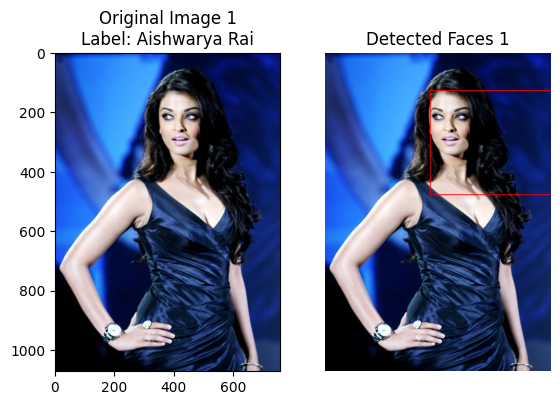

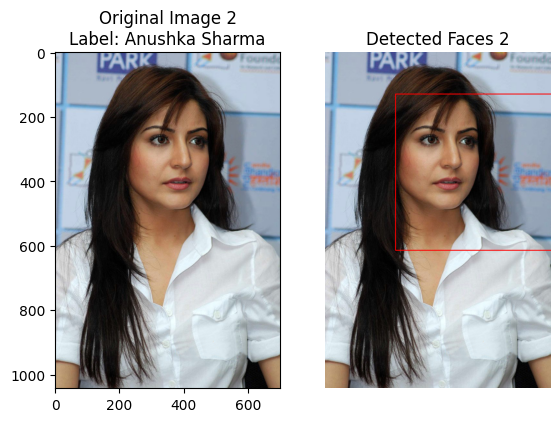

Distance between embeddings: 0.2232


In [ ]:
from facenet_pytorch import MTCNN, InceptionResnetV1, extract_face
from PIL import Image
from sklearn.metrics.pairwise import euclidean_distances

# Function to process images, detect faces, and calculate embeddings
def process_images(folder_path1, file1, folder_path2, file2, face_detector, face_embedder):
    # Read the images
    image1_path = os.path.join(folder_path1, file1)
    image2_path = os.path.join(folder_path2, file2)

    image1 = cv2.imread(image1_path)
    image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

    image2 = cv2.imread(image2_path)
    image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

    # Detect faces using MTCNN
    faces1, _ = face_detector.detect(image1_rgb)
    faces2, _ = face_detector.detect(image2_rgb)

    # Get labels from folder names
    label1 = os.path.basename(folder_path1)
    label2 = os.path.basename(folder_path2)

    # Display original images with rectangles around detected faces
    plt.subplot(1, 2, 1)
    plt.imshow(Image.fromarray(image1_rgb))
    plt.title(f"Original Image 1\nLabel: {label1}")

    for i, face in enumerate(faces1):
        x, y, w, h = face
        # Draw a rectangle around the detected face
        cv2.rectangle(image1_rgb, (int(x), int(y)), (int(x+w), int(y+h)), (255, 0, 0), 2)

    plt.subplot(1, 2, 2)
    plt.imshow(Image.fromarray(image1_rgb))
    plt.title(f"Detected Faces 1")
    plt.axis('off')

    plt.show()

    plt.subplot(1, 2, 1)
    plt.imshow(Image.fromarray(image2_rgb))
    plt.title(f"Original Image 2\nLabel: {label2}")

    for i, face in enumerate(faces2):
        x, y, w, h = face
        # Draw a rectangle around the detected face
        cv2.rectangle(image2_rgb, (int(x), int(y)), (int(x+w), int(y+h)), (255, 0, 0), 2)

    plt.subplot(1, 2, 2)
    plt.imshow(Image.fromarray(image2_rgb))
    plt.title(f"Detected Faces 2")
    plt.axis('off')

    plt.show()

    # Calculate embeddings for the first image
    embeddings1 = [face_embedder(extract_face(image1_rgb, face).unsqueeze(0)).squeeze().detach().numpy() for face in faces1]

    # Print the embeddings for the first image
    #for i, embeddings in enumerate(embeddings1):
     #   print(f"Embeddings for Detected Face {i + 1} in Image 1:", embeddings)

    # Calculate embeddings for the second image
    embeddings2 = [face_embedder(extract_face(image2_rgb, face).unsqueeze(0)).squeeze().detach().numpy() for face in faces2]

    # Print the embeddings for the second image
   # for i, embeddings in enumerate(embeddings2):
    #    print(f"Embeddings for Detected Face {i + 1} in Image 2:", embeddings)

    # Calculate distance between the two embeddings
    distance = euclidean_distances(embeddings1[0].reshape(1, -1), embeddings2[0].reshape(1, -1))[0][0]

    # Display the distance between the two embeddings
    print(f"Distance between embeddings: {distance:.4f}")

# Directory paths
train_directory = '/content/drive/MyDrive/datasets/celebrities_images'

# Randomly pick two folders
selected_folders = random.sample(os.listdir(train_directory), 2)

# Randomly pick one file from each selected folder
file1 = random.choice(os.listdir(os.path.join(train_directory, selected_folders[0])))
file2 = random.choice(os.listdir(os.path.join(train_directory, selected_folders[1])))

# Initialize MTCNN for face detection
face_detector = MTCNN(keep_all=True)

# Initialize InceptionResnetV1 for face embedding
face_embedder = InceptionResnetV1(pretrained='vggface2').eval()

# Process images, detect faces, calculate embeddings, and display results
process_images(
    os.path.join(train_directory, selected_folders[0]),
    file1,
    os.path.join(train_directory, selected_folders[1]),
    file2,
    face_detector,
    face_embedder
)

In [ ]:
import os
import cv2
import numpy as np

data_directory = '/content/drive/MyDrive/datasets/celebrities_images'
output_directory = '/content/drive/MyDrive/datasets/train_detected_faces'

def detect_faces_and_save(image_paths, output_directory):
    processed_images = []
    images_without_faces = 0
    images_not_loaded = 0  # To track images that couldn't be loaded

    for i, image_path in enumerate(image_paths):
        # Attempt to read the image
        img = cv2.imread(image_path)

        # Check if the image is loaded successfully
        if img is None:
            print(f"Error loading image: {image_path}")
            images_not_loaded += 1
            continue  # Skip this image

        # Convert image to grayscale for face detection
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Use OpenCV's face detector (Haar Cascade)
        face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

        if len(faces) > 0:
            # Assuming only one face is detected, extract the face region
            x, y, w, h = faces[0]
            face_roi = img[y:y+h, x:x+w]
            resized_face = cv2.resize(face_roi, (224, 224))

            # Get the folder name from the image path
            folder_name = image_path.split('/')[-2]
            output_folder = os.path.join(output_directory, folder_name)
            os.makedirs(output_folder, exist_ok=True)

            # Save the detected face to the output directory
            output_path = os.path.join(output_folder, f"detected_face_{i}.jpg")
            cv2.imwrite(output_path, resized_face)

            processed_images.append(resized_face)
        else:
            images_without_faces += 1

        if i % 50 == 0:
            print(f"{i}/{len(image_paths)} images processed", end='\r', flush=True)

    print(f"\nImages without faces detected: {images_without_faces}/{len(image_paths)}")
    print(f"Images not loaded: {images_not_loaded}/{len(image_paths)}")
    return np.array(processed_images)

# Create output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Get list of all image paths from the directory
all_image_paths = []
for folder_name in os.listdir(data_directory):
    folder_path = os.path.join(data_directory, folder_name)
    if os.path.isdir(folder_path):
        image_paths = [os.path.join(folder_path, image_name) for image_name in os.listdir(folder_path)]
        all_image_paths.extend(image_paths)

X_all_processed = detect_faces_and_save(all_image_paths, output_directory)

print("Face detection complete")


Error loading image: /content/drive/MyDrive/datasets/celebrities_images/Anushka Sharma/34

Images without faces detected: 276/1959
Images not loaded: 1/1959
Face detection complete


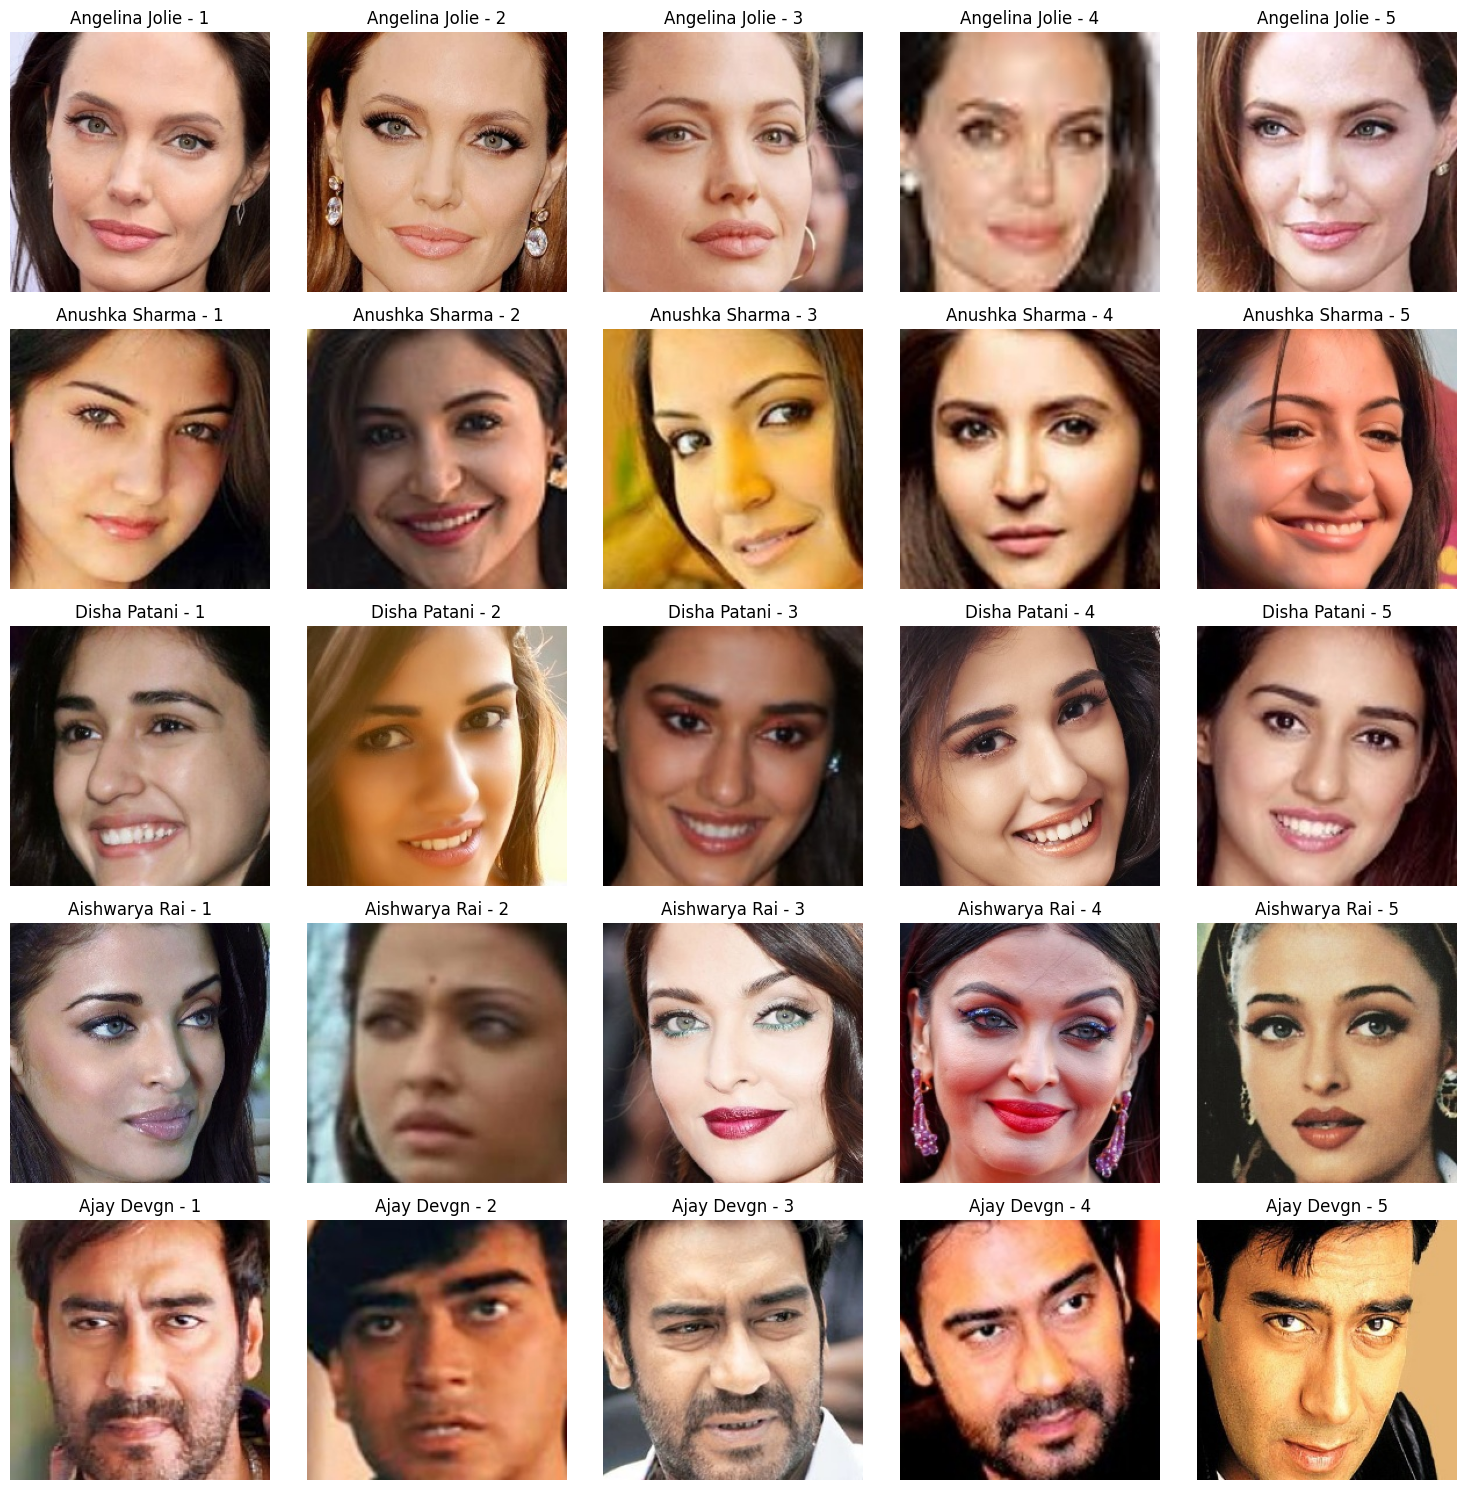

In [10]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Replace this with the path to your detected faces directory
output_directory = '/content/drive/MyDrive/datasets/train_detected_faces'

# Get a list of subdirectories (folders) in the output directory
folders = [f for f in os.listdir(output_directory) if os.path.isdir(os.path.join(output_directory, f))]

# Randomly pick five folders
selected_folders = np.random.choice(folders, size=5, replace=False)

# Set up the subplot
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 15))

for i, folder_name in enumerate(selected_folders):
    folder_path = os.path.join(output_directory, folder_name)
    image_paths = [os.path.join(folder_path, image_name) for image_name in os.listdir(folder_path)[:5]]

    for j, image_path in enumerate(image_paths):
        # Read the image using OpenCV
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Display the image
        axes[i, j].imshow(img)
        axes[i, j].set_title(f'{folder_name} - {j+1}')
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()

In [11]:
import os

output_directory = '/content/drive/MyDrive/datasets/train_detected_faces'

# Get a list of all folders under the output directory
all_folders = [folder for folder in os.listdir(output_directory) if os.path.isdir(os.path.join(output_directory, folder))]

# Iterate through each folder and print the folder name and file count
for folder in all_folders:
    folder_path = os.path.join(output_directory, folder)
    file_count = len(os.listdir(folder_path))
    print(f"Folder: {folder}, File Count: {file_count}")

Folder: Aamir Khan, File Count: 170
Folder: Aishwarya Rai, File Count: 199
Folder: Ajay Devgn, File Count: 129
Folder: Alia Bhatt, File Count: 185
Folder: Amitabh Bachchan, File Count: 149
Folder: Angelina Jolie, File Count: 167
Folder: Anushka Sharma, File Count: 181
Folder: Deepika Padukone, File Count: 176
Folder: Disha Patani, File Count: 164
Folder: IIeana DCruz, File Count: 162


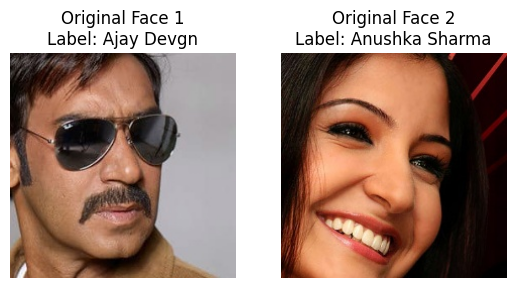

Distance between embeddings: 1.4267


In [12]:
from facenet_pytorch import InceptionResnetV1
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
import torch

# Function to process images and calculate embeddings
def process_images(face1_path, face2_path, face_embedder):
    # Read the pre-detected face images
    face1 = cv2.imread(face1_path)
    face1_rgb = cv2.cvtColor(face1, cv2.COLOR_BGR2RGB)

    face2 = cv2.imread(face2_path)
    face2_rgb = cv2.cvtColor(face2, cv2.COLOR_BGR2RGB)

    # Get labels from folder names
    label1 = os.path.basename(os.path.dirname(face1_path))
    label2 = os.path.basename(os.path.dirname(face2_path))

    # Display original face images
    plt.subplot(1, 2, 1)
    plt.imshow(Image.fromarray(face1_rgb))
    plt.title(f"Original Face 1\nLabel: {label1}")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(Image.fromarray(face2_rgb))
    plt.title(f"Original Face 2\nLabel: {label2}")
    plt.axis('off')

    plt.show()

    # Convert NumPy arrays to PyTorch tensors
    face1_tensor = torch.from_numpy(face1_rgb.transpose(2, 0, 1)).unsqueeze(0).float() / 255.0
    face2_tensor = torch.from_numpy(face2_rgb.transpose(2, 0, 1)).unsqueeze(0).float() / 255.0

    # Calculate embeddings for the first face
    embeddings1 = face_embedder(face1_tensor).detach().numpy()

    # Print the embeddings for the first face
    # print("Embeddings for Face 1:", embeddings1)

    # Calculate embeddings for the second face
    embeddings2 = face_embedder(face2_tensor).detach().numpy()

    # Print the embeddings for the second face
    # print("Embeddings for Face 2:", embeddings2)

    # Calculate distance between the two embeddings
    distance = euclidean_distances(embeddings1.reshape(1, -1), embeddings2.reshape(1, -1))[0][0]

    # Display the distance between the two embeddings
    print(f"Distance between embeddings: {distance:.4f}")

# Directory paths
train_detected_faces_directory = '/content/drive/MyDrive/datasets/train_detected_faces'

# Randomly pick two folders
selected_folders = random.sample(os.listdir(train_detected_faces_directory), 2)

# Randomly pick one file from each selected folder
file1 = random.choice(os.listdir(os.path.join(train_detected_faces_directory, selected_folders[0])))
file2 = random.choice(os.listdir(os.path.join(train_detected_faces_directory, selected_folders[1])))

# Full paths for the selected faces
face1_path = os.path.join(train_detected_faces_directory, selected_folders[0], file1)
face2_path = os.path.join(train_detected_faces_directory, selected_folders[1], file2)

# Initialize InceptionResnetV1 for face embedding
face_embedder = InceptionResnetV1(pretrained='vggface2').eval()

# Process face images, calculate embeddings, and display results
process_images(face1_path, face2_path, face_embedder)

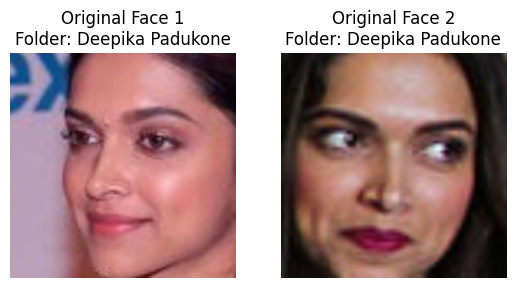

Distance between embeddings: 0.8327


In [13]:
import os
import random
from facenet_pytorch import InceptionResnetV1
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import torch

# Function to process images and calculate embeddings
def process_images(folder_path, face1_file, face2_file, face_embedder):
    # Read the pre-detected face images
    face1_path = os.path.join(folder_path, face1_file)
    face2_path = os.path.join(folder_path, face2_file)

    face1 = cv2.imread(face1_path)
    face1_rgb = cv2.cvtColor(face1, cv2.COLOR_BGR2RGB)

    face2 = cv2.imread(face2_path)
    face2_rgb = cv2.cvtColor(face2, cv2.COLOR_BGR2RGB)

    # Display original face images
    plt.subplot(1, 2, 1)
    plt.imshow(Image.fromarray(face1_rgb))
    plt.title(f"Original Face 1\nFolder: {os.path.basename(folder_path)}")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(Image.fromarray(face2_rgb))
    plt.title(f"Original Face 2\nFolder: {os.path.basename(folder_path)}")
    plt.axis('off')

    plt.show()

    # Convert NumPy arrays to PyTorch tensors
    face1_tensor = torch.from_numpy(face1_rgb.transpose(2, 0, 1)).unsqueeze(0).float() / 255.0
    face2_tensor = torch.from_numpy(face2_rgb.transpose(2, 0, 1)).unsqueeze(0).float() / 255.0

    # Calculate embeddings for the first face
    embeddings1 = face_embedder(face1_tensor).detach().numpy()

    # Print the embeddings for the first face
    # print("Embeddings for Face 1:", embeddings1)

    # Calculate embeddings for the second face
    embeddings2 = face_embedder(face2_tensor).detach().numpy()

    # Print the embeddings for the second face
    # print("Embeddings for Face 2:", embeddings2)

    # Calculate distance between the two embeddings
    distance = euclidean_distances(embeddings1.reshape(1, -1), embeddings2.reshape(1, -1))[0][0]

    # Display the distance between the two embeddings
    print(f"Distance between embeddings: {distance:.4f}")

# Directory paths
train_detected_faces_directory = '/content/drive/MyDrive/datasets/train_detected_faces'

# Randomly pick one folder
selected_folder = random.choice(os.listdir(train_detected_faces_directory))
folder_path = os.path.join(train_detected_faces_directory, selected_folder)

# Randomly pick two different files from the selected folder
files = random.sample(os.listdir(folder_path), 2)
face1_file, face2_file = files

# Initialize InceptionResnetV1 for face embedding
face_embedder = InceptionResnetV1(pretrained='vggface2').eval()

# Process face images, calculate embeddings, and display results
process_images(folder_path, face1_file, face2_file, face_embedder)

In [14]:
import torch
from facenet_pytorch import InceptionResnetV1
from PIL import Image
from torchvision import transforms
from tqdm import tqdm

# Function to extract embeddings from a single folder with data augmentation
def extract_embeddings_from_folder(folder_path, face_embedder, device, output_directory):
    embeddings = {}
    data_transform = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
        transforms.RandomRotation(10),
        transforms.ToTensor()
    ])

    label = os.path.basename(folder_path)  # Get the label from the folder name

    for image_name in tqdm(os.listdir(folder_path), desc=f"Processing {folder_path}"):
        image_path = os.path.join(folder_path, image_name)
        try:
            img = Image.open(image_path)

            # Convert image to tensor
            img_tensor = transforms.ToTensor()(img).unsqueeze(0).float().to(device)

            # Calculate embedding
            embedding = face_embedder(img_tensor).squeeze().detach().cpu().numpy()
            embeddings[image_name] = embedding

            # Save the embedding for the original image
            output_emb_path = os.path.join(output_directory, f"{label}_{os.path.splitext(image_name)[0]}_embedding.npy")
            np.save(output_emb_path, embedding)

            # Apply data augmentation
            augmented_img = data_transform(img)

            # Convert augmented image to tensor
            img_tensor_augmented = augmented_img.unsqueeze(0).float().to(device)

            # Calculate embedding for the augmented image
            embedding_augmented = face_embedder(img_tensor_augmented).squeeze().detach().cpu().numpy()
            embeddings[f"{os.path.splitext(image_name)[0]}_augmented_embedding.npy"] = embedding_augmented

            # Save the embedding for the augmented image
            output_emb_path_augmented = os.path.join(output_directory, f"{label}_{os.path.splitext(image_name)[0]}_augmented_embedding.npy")
            np.save(output_emb_path_augmented, embedding_augmented)

        except Exception as e:
            print(f"Error processing {image_name}: {str(e)}")

    return label, embeddings

# Directory paths
input_directory = '/content/drive/MyDrive/datasets/train_detected_faces'
output_directory = '/content/drive/MyDrive/datasets/extracted_embeddings'

# Initialize InceptionResnetV1 for face embedding
device = 'cpu'
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
face_embedder = InceptionResnetV1(pretrained='vggface2').eval().to(device)

# Loop through each folder in the input directory
for folder_name in os.listdir(input_directory):
    folder_path = os.path.join(input_directory, folder_name)

    # Create subfolder in output_directory for the current label
    label_output_directory = os.path.join(output_directory, folder_name)
    os.makedirs(label_output_directory, exist_ok=True)

    # Extract embeddings from the current folder with data augmentation
    label, embeddings = extract_embeddings_from_folder(folder_path, face_embedder, device, label_output_directory)

print("Embeddings extraction complete.")

Processing /content/drive/MyDrive/datasets/train_detected_faces/Aamir Khan: 100%|██████████| 170/170 [02:55<00:00,  1.03s/it]
Processing /content/drive/MyDrive/datasets/train_detected_faces/Aishwarya Rai: 100%|██████████| 199/199 [03:22<00:00,  1.02s/it]
Processing /content/drive/MyDrive/datasets/train_detected_faces/Ajay Devgn: 100%|██████████| 129/129 [02:15<00:00,  1.05s/it]
Processing /content/drive/MyDrive/datasets/train_detected_faces/Alia Bhatt: 100%|██████████| 185/185 [03:09<00:00,  1.03s/it]
Processing /content/drive/MyDrive/datasets/train_detected_faces/Amitabh Bachchan: 100%|██████████| 149/149 [02:29<00:00,  1.01s/it]
Processing /content/drive/MyDrive/datasets/train_detected_faces/Angelina Jolie: 100%|██████████| 167/167 [02:52<00:00,  1.03s/it]
Processing /content/drive/MyDrive/datasets/train_detected_faces/Anushka Sharma: 100%|██████████| 181/181 [03:08<00:00,  1.04s/it]
Processing /content/drive/MyDrive/datasets/train_detected_faces/Deepika Padukone: 100%|██████████| 17

Embeddings extraction complete.


In [15]:
import os

# Directory path
output_directory = '/content/drive/MyDrive/datasets/extracted_embeddings'

# Get folder names and file counts
folders_and_counts = [(folder, len(os.listdir(os.path.join(output_directory, folder)))) for folder in os.listdir(output_directory)]

# Print results
for folder, count in folders_and_counts:
    print(f"Folder: {folder}, Number of Files: {count}")

Folder: Aamir Khan, Number of Files: 340
Folder: Aishwarya Rai, Number of Files: 398
Folder: Ajay Devgn, Number of Files: 258
Folder: Alia Bhatt, Number of Files: 370
Folder: Amitabh Bachchan, Number of Files: 298
Folder: Angelina Jolie, Number of Files: 334
Folder: Anushka Sharma, Number of Files: 362
Folder: Deepika Padukone, Number of Files: 352
Folder: Disha Patani, Number of Files: 328
Folder: IIeana DCruz, Number of Files: 324


In [16]:
import shutil

source_folder = "/content/drive/MyDrive/datasets/extracted_embeddings"
destination_folder = "/content/drive/MyDrive/datasets/extracted_embeddingstest"

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Iterate through each folder in the source directory
for folder_name in os.listdir(source_folder):
    folder_path = os.path.join(source_folder, folder_name)

    # Check if it's a directory
    if os.path.isdir(folder_path):
        # Create the corresponding folder in the destination directory
        destination_folder_path = os.path.join(destination_folder, folder_name)
        os.makedirs(destination_folder_path, exist_ok=True)

        # Get the list of files in the current folder
        files = os.listdir(folder_path)

        # Move the first two files that do not contain "augmented" in their names
        moved_files = 0
        for file_name in files:
            if "augmented" not in file_name:
                source_file_path = os.path.join(folder_path, file_name)
                destination_file_path = os.path.join(destination_folder_path, file_name)

                # Move the file (not copy)
                shutil.move(source_file_path, destination_file_path)
                moved_files += 1

                if moved_files == 2:
                    break  # Break after moving two suitable files

print("Files moved successfully.")

Files moved successfully.


In [17]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566166 sha256=9ad247f1df960aa14718c3ec4a02d74f3783b92140d8923b1949dc9e9780914a
  Stored in directory: /root/.cache/pip/wheels/8f/47/c8/f44c5aebb7507f7c8a2c0bd23151d732d0f0bd6884ad4ac635
Successfully built face-recognition-models


In [18]:
!pip install facenet-pytorch numpy scikit-learn

In [19]:
from sklearn.metrics import pairwise_distances

# Function to calculate average embedding for each label
def calculate_average_embeddings(base_folder):
    average_embeddings = {}

    for label_folder in os.listdir(base_folder):
        label_path = os.path.join(base_folder, label_folder)
        if os.path.isdir(label_path):
            label_embeddings = []
            for file_name in os.listdir(label_path):
                file_path = os.path.join(label_path, file_name)
                # Load embeddings using your preferred method (e.g., np.load())
                embedding = np.load(file_path)
                label_embeddings.append(embedding)

            # Calculate average embedding for the label
            average_embedding = np.mean(label_embeddings, axis=0)
            average_embeddings[label_folder] = average_embedding

    return average_embeddings

# Function to recognize faces based on existing embeddings
def recognize_faces(test_folder, average_embeddings):
    predictions = []

    for label_folder in os.listdir(test_folder):
        label_path = os.path.join(test_folder, label_folder)
        if os.path.isdir(label_path):
            for file_name in os.listdir(label_path):
                file_path = os.path.join(label_path, file_name)

                # Load test embedding from the saved numpy file
                test_embedding = np.load(file_path)

                # Compare test embedding with averaged embeddings
                distances = {}
                for label, avg_embedding in average_embeddings.items():
                    distance = np.linalg.norm(test_embedding - avg_embedding)
                    distances[label] = distance

                # Predict the label with the minimum distance
                predicted_label = min(distances, key=distances.get)
                predictions.append((file_name, label_folder, predicted_label))

    return predictions


# folder paths
base_folder = '/content/drive/MyDrive/datasets/extracted_embeddings'
test_folder = '/content/drive/MyDrive/datasets/extracted_embeddingstest'

# Load existing average embeddings
average_embeddings = calculate_average_embeddings(base_folder)

# Recognize faces in the test folder
predictions = recognize_faces(test_folder, average_embeddings)

# Print the predictions
for file_name, actual_label, predicted_label in predictions:
    print(f"{file_name}: Actual Label - {actual_label}, Predicted Label - {predicted_label}")

Aamir Khan_detected_face_2_embedding.npy: Actual Label - Aamir Khan, Predicted Label - Aamir Khan
Aamir Khan_detected_face_4_embedding.npy: Actual Label - Aamir Khan, Predicted Label - Aamir Khan
Aamir Khan_detected_face_0_embedding.npy: Actual Label - Aamir Khan, Predicted Label - Aamir Khan
Aamir Khan_detected_face_1_embedding.npy: Actual Label - Aamir Khan, Predicted Label - Aamir Khan
Aishwarya Rai_detected_face_191_embedding.npy: Actual Label - Aishwarya Rai, Predicted Label - Aishwarya Rai
Aishwarya Rai_detected_face_192_embedding.npy: Actual Label - Aishwarya Rai, Predicted Label - Aishwarya Rai
Aishwarya Rai_detected_face_189_embedding.npy: Actual Label - Aishwarya Rai, Predicted Label - Aishwarya Rai
Aishwarya Rai_detected_face_190_embedding.npy: Actual Label - Aishwarya Rai, Predicted Label - Aishwarya Rai
Ajay Devgn_detected_face_409_embedding.npy: Actual Label - Ajay Devgn, Predicted Label - Ajay Devgn
Ajay Devgn_detected_face_410_embedding.npy: Actual Label - Ajay Devgn, P

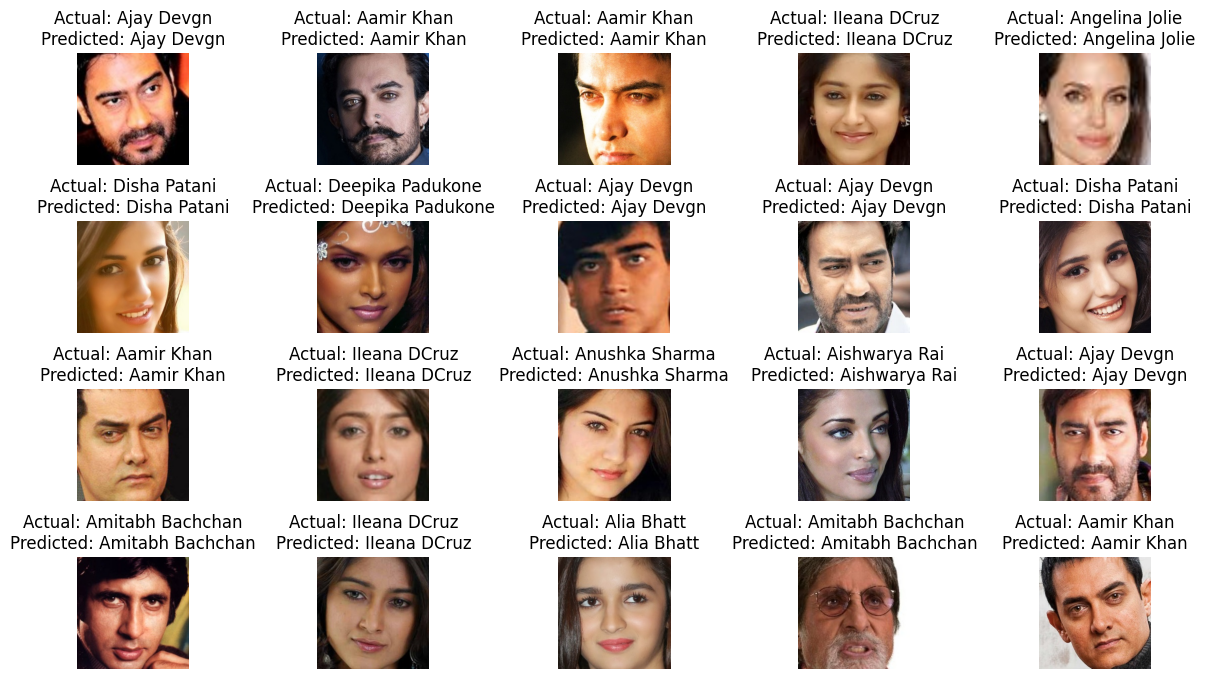

In [20]:
from sklearn.metrics import pairwise_distances
from PIL import Image

# Function to calculate average embedding for each label
def calculate_average_embeddings(base_folder):
    average_embeddings = {}

    for label_folder in os.listdir(base_folder):
        label_path = os.path.join(base_folder, label_folder)
        if os.path.isdir(label_path):
            label_embeddings = []
            for file_name in os.listdir(label_path):
                file_path = os.path.join(label_path, file_name)
                # Load embeddings using your preferred method (e.g., np.load())
                embedding = np.load(file_path)
                label_embeddings.append(embedding)

            # Calculate average embedding for the label
            average_embedding = np.mean(label_embeddings, axis=0)
            average_embeddings[label_folder] = average_embedding

    return average_embeddings

# Function to recognize faces based on existing embeddings
def recognize_faces(test_folder, average_embeddings):
    predictions = []

    for label_folder in os.listdir(test_folder):
        label_path = os.path.join(test_folder, label_folder)
        if os.path.isdir(label_path):
            for file_name in os.listdir(label_path):
                file_path = os.path.join(label_path, file_name)

                # Load test embedding from the saved numpy file
                test_embedding = np.load(file_path)

                # Compare test embedding with averaged embeddings
                distances = {}
                for label, avg_embedding in average_embeddings.items():
                    distance = np.linalg.norm(test_embedding - avg_embedding)
                    distances[label] = distance

                # Predict the label with the minimum distance
                predicted_label = min(distances, key=distances.get)
                predictions.append((file_name, label_folder, predicted_label))

    return predictions

import random

# Function to display images with actual and predicted labels
def display_random_images(predictions, image_folder, num_images=40):
    selected_predictions = random.sample(predictions, min(num_images, len(predictions)))

    # Calculate the number of rows and columns based on the desired number of images
    num_rows = (num_images + 4) // 5  # Ensure at least 1 row
    num_cols = min(5, num_images)  # Maximum of 5 columns

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 2 * num_rows))
    fig.subplots_adjust(hspace=0.5)  # Adjust the vertical spacing

    for i, (file_name, actual_label, predicted_label) in enumerate(selected_predictions):
        # Extract identifier from the file name
        identifier_start = file_name.find("_detected_face_") + len("_detected_face_")
        identifier_end = file_name.find("_", identifier_start)
        if identifier_end == -1:
            identifier = file_name[identifier_start:]
        else:
            identifier = file_name[identifier_start:identifier_end]

        # Construct the file path for the corresponding image
        image_name = f"detected_face_{identifier}.jpg"
        image_path = os.path.join(image_folder, actual_label, image_name)

        # Display the actual image along with labels
        try:
            image = Image.open(image_path)
            axes[i // 5, i % 5].imshow(image)
            axes[i // 5, i % 5].set_title(f"Actual: {actual_label}\nPredicted: {predicted_label}")
            axes[i // 5, i % 5].axis('off')

        except FileNotFoundError:
            print(f"Image not found for {identifier}. Skipping to the next one.")

    plt.show()

display_random_images(predictions, '/content/drive/MyDrive/datasets/train_detected_faces', num_images=20)

# folder paths
base_folder = '/content/drive/MyDrive/datasets/extracted_embeddings'
test_folder = '/content/drive/MyDrive/datasets/extracted_embeddingstest'
image_folder = '/content/drive/MyDrive/datasets/train_detected_faces'

# Load existing average embeddings
average_embeddings = calculate_average_embeddings(base_folder)

# Recognize faces in the test folder
predictions = recognize_faces(test_folder, average_embeddings)

# Display 10 images with actual and predicted labels
#display_images(predictions, image_folder, num_images=10)

In [21]:
def load_test_embeddings(test_folder):
    test_embeddings = []

    for label_folder in os.listdir(test_folder):
        label_path = os.path.join(test_folder, label_folder)
        if os.path.isdir(label_path):
            for file_name in os.listdir(label_path):
                file_path = os.path.join(label_path, file_name)

                # Load test embedding from the saved numpy file
                test_embedding = np.load(file_path)
                test_embeddings.append((file_name, label_folder, test_embedding))

    return test_embeddings


# folder paths
base_folder = '/content/drive/MyDrive/datasets/extracted_embeddings'
test_folder = '/content/drive/MyDrive/datasets/extracted_embeddingstest'

# Load existing average embeddings
average_embeddings = calculate_average_embeddings(base_folder)

# Load test embeddings
test_embeddings = load_test_embeddings(test_folder)

# Randomly pick two test embeddings
random_test_embeddings = random.sample(test_embeddings, 2)

# Print the randomly picked test embeddings
#for file_name, label, test_embedding in random_test_embeddings:
 #   print(f"Randomly Picked Test Embedding ({label}): {test_embedding}")

# Calculate and print distances between the random test embeddings and all average embeddings
for file_name, label, test_embedding in random_test_embeddings:
    print(f"\nDistances for {file_name} ({label}) against Average Embeddings:")
    for avg_label, avg_embedding in average_embeddings.items():
        distance = np.linalg.norm(test_embedding - avg_embedding)
        print(f"  Distance to {avg_label}: {distance}")


Distances for Angelina Jolie_detected_face_974_embedding.npy (Angelina Jolie) against Average Embeddings:
  Distance to Aamir Khan: 1.2620819807052612
  Distance to Aishwarya Rai: 1.1284446716308594
  Distance to Ajay Devgn: 1.2472641468048096
  Distance to Alia Bhatt: 1.314993977546692
  Distance to Amitabh Bachchan: 1.3092862367630005
  Distance to Angelina Jolie: 0.5416551232337952
  Distance to Anushka Sharma: 1.110174536705017
  Distance to Deepika Padukone: 1.123447299003601
  Distance to Disha Patani: 1.1673922538757324
  Distance to IIeana DCruz: 1.2712374925613403

Distances for Angelina Jolie_detected_face_972_embedding.npy (Angelina Jolie) against Average Embeddings:
  Distance to Aamir Khan: 1.182085633277893
  Distance to Aishwarya Rai: 1.1466642618179321
  Distance to Ajay Devgn: 1.149873971939087
  Distance to Alia Bhatt: 1.3867117166519165
  Distance to Amitabh Bachchan: 1.203365445137024
  Distance to Angelina Jolie: 0.5167909264564514
  Distance to Anushka Sharma: 1.

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Disable CUDA
torch.cuda.is_available = lambda : False

# Set the device to CPU
device = torch.device("cpu")

# Load embeddings and labels
data_dir = "/content/drive/MyDrive/datasets/extracted_embeddings"
embeddings = []
labels = []

for label_folder in os.listdir(data_dir):
    label_path = os.path.join(data_dir, label_folder)
    if os.path.isdir(label_path):
        label = label_folder  # Assuming the folder names are labels
        embeddings_per_label = []

        for file_name in os.listdir(label_path):
            file_path = os.path.join(label_path, file_name)
            if file_name.endswith(".npy"):
                embedding = np.load(file_path)
                embeddings_per_label.append(embedding)
                labels.append(label)

        embeddings.append(embeddings_per_label)

# Flatten the embeddings list
embeddings = [item for sublist in embeddings for item in sublist]

# Convert data to PyTorch tensors
X = torch.tensor(embeddings, dtype=torch.float32)
labels = np.array(labels)

# Use LabelEncoder to encode string labels into integers
label_encoder = LabelEncoder()
y = torch.tensor(label_encoder.fit_transform(labels), dtype=torch.long)

# Split the data into 80% training, 10% validation, and 10% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define an updated model with more layers
class UpdatedModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(UpdatedModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(256, 128)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(128, 64)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        return x

# Initialize the model
input_size = X_train.shape[1]
num_classes = len(set(y_train))
model = UpdatedModel(input_size, num_classes).to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 20
batch_size = 32

for epoch in range(num_epochs):
    model.train()
    for i in range(0, len(X_train), batch_size):
        inputs = X_train[i:i+batch_size].to(device)
        labels = y_train[i:i+batch_size].to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # Validation
    model.eval()
    with torch.no_grad():
        val_inputs = X_val.to(device)
        val_labels = y_val.to(device)

        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_labels)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}")

# Evaluation on the test data
model.eval()
with torch.no_grad():
    test_inputs = X_test.to(device)
    test_labels = y_test.to(device)

    test_outputs = model(test_inputs)
    test_loss = criterion(test_outputs, test_labels)

# Decode the predicted labels using inverse_transform
predicted_labels = label_encoder.inverse_transform(torch.argmax(test_outputs, dim=1).cpu().numpy())

# Decode the true labels using inverse_transform
true_labels = label_encoder.inverse_transform(y_test.cpu().numpy())

# Display classification report and confusion matrix
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

#print("Confusion Matrix:")
#print(confusion_matrix(true_labels, predicted_labels))

/tmp/ipython-input-1268460031.py:39: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  X = torch.tensor(embeddings, dtype=torch.float32)


Epoch 1/20, Train Loss: 1.2836, Validation Loss: 1.2487
Epoch 2/20, Train Loss: 0.2633, Validation Loss: 0.3014
Epoch 3/20, Train Loss: 0.1261, Validation Loss: 0.1736
Epoch 4/20, Train Loss: 0.0557, Validation Loss: 0.1406
Epoch 5/20, Train Loss: 0.0221, Validation Loss: 0.1278
Epoch 6/20, Train Loss: 0.0137, Validation Loss: 0.1176
Epoch 7/20, Train Loss: 0.0096, Validation Loss: 0.1102
Epoch 8/20, Train Loss: 0.0072, Validation Loss: 0.1052
Epoch 9/20, Train Loss: 0.0048, Validation Loss: 0.0993
Epoch 10/20, Train Loss: 0.0034, Validation Loss: 0.0954
Epoch 11/20, Train Loss: 0.0024, Validation Loss: 0.0912
Epoch 12/20, Train Loss: 0.0018, Validation Loss: 0.0898
Epoch 13/20, Train Loss: 0.0015, Validation Loss: 0.0883
Epoch 14/20, Train Loss: 0.0012, Validation Loss: 0.0897
Epoch 15/20, Train Loss: 0.0010, Validation Loss: 0.0879
Epoch 16/20, Train Loss: 0.0009, Validation Loss: 0.0885
Epoch 17/20, Train Loss: 0.0007, Validation Loss: 0.0876
Epoch 18/20, Train Loss: 0.0005, Validat

In [23]:
import os
from facenet_pytorch import InceptionResnetV1
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np
import torch

# Function to process images and calculate embeddings
def process_image(image_path, face_embedder):
    # Read the pre-detected face image
    face = cv2.imread(image_path)
    face_rgb = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

    # Display original face image
    plt.imshow(Image.fromarray(face_rgb))
    plt.title(f"Original Face\nFile: {os.path.basename(image_path)}")
    plt.axis('off')
    plt.show()

    # Convert NumPy array to PyTorch tensor
    face_tensor = torch.from_numpy(face_rgb.transpose(2, 0, 1)).unsqueeze(0).float() / 255.0

    # Calculate embedding for the face
    embedding = face_embedder(face_tensor).detach().numpy()

    return embedding


In [24]:
def calculate_average_embeddings(base_folder):
    average_embeddings = {}

    for label_folder in os.listdir(base_folder):
        label_path = os.path.join(base_folder, label_folder)
        if os.path.isdir(label_path):
            label_embeddings = []
            for file_name in os.listdir(label_path):
                file_path = os.path.join(label_path, file_name)
                # Load embeddings using your preferred method (e.g., np.load())
                embedding = np.load(file_path)
                label_embeddings.append(embedding)

            # Calculate average embedding for the label
            average_embedding = np.mean(label_embeddings, axis=0)
            average_embeddings[label_folder] = average_embedding

    return average_embeddings


In [25]:
def recognize_face(new_test_embedding, average_embeddings):
    distances = {}
    for label, avg_embedding in average_embeddings.items():
        distance = np.linalg.norm(new_test_embedding - avg_embedding)
        distances[label] = distance

    # Predict the label with the minimum distance
    predicted_label = min(distances, key=distances.get)
    return predicted_label, distances[predicted_label]


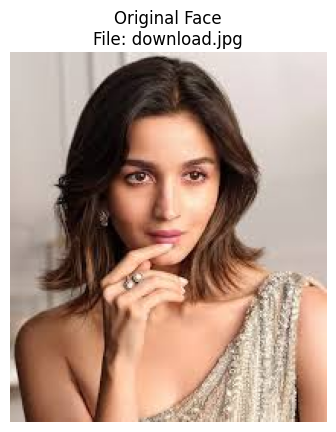

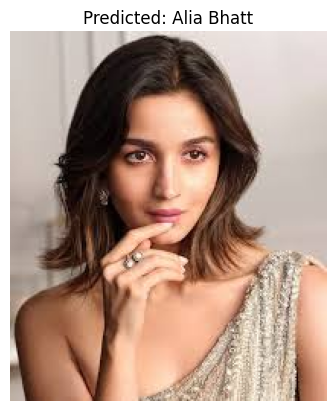

Predicted Label: Alia Bhatt, Distance: 0.8741


In [30]:
# Folder paths
base_folder = '/content/drive/MyDrive/datasets/extracted_embeddings'
new_test_image_path = '/content/download.jpg'  # Provide the path to your new test image

# Initialize InceptionResnetV1 for face embedding
face_embedder = InceptionResnetV1(pretrained='vggface2').eval()

# Load existing average embeddings
average_embeddings = calculate_average_embeddings(base_folder)

# Load and process the new test image
new_test_embedding = process_image(new_test_image_path, face_embedder)

# Recognize the face in the new test image
predicted_label, distance = recognize_face(new_test_embedding, average_embeddings)



# Display the new test image with the predicted label
image = Image.open(new_test_image_path)
plt.imshow(image)
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()

# Print the result
print(f"Predicted Label: {predicted_label}, Distance: {distance:.4f}")
